In [1]:
%pylab inline
import matplotlib.gridspec as gridspec
import seaborn as sns
from datetime import datetime

PAPER_PRESET = {"style": "ticks", "font": "Helvetica", "context": "paper", 
                "rc": {"font.size":20,"axes.titlesize":22,
                       "axes.labelsize":22, 'axes.linewidth': 2,
                       "legend.fontsize":20, "xtick.labelsize": 20,
                       "ytick.labelsize":20, "xtick.major.size": 8.0,
                       "ytick.major.size": 8.0, "axes.edgecolor": "black",
                       "xtick.major.pad": 3.0, "ytick.major.pad": 3.0}}
PAPER_FONTSIZE = 20
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


from collections import defaultdict
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = """Serum-CEA 5.87 12-Apr-2019
Serum-CEA 4.92 12-Dec-2018
Serum-AFP 2.84 12-Dec-2018
Serum-CEA 5.71 11-Aug-2018
Serum-CEA 6.14 19-May-2018
Serum-CEA 6.26 23-Apr-2018
Serum-CEA 5.24 10-Apr-2018
Serum-CEA 6.06 09-Mar-2018
Serum-CEA 5.02 05-Jan-2018
Serum-CEA 5.03 22-Dec-2017
Serum-CEA 6.16 04-Oct-2017
Serum-CEA 6.30 08-Jul-2017
Serum-CEA 6.86 11-Apr-2017
Serum-AFP 6.02 27-Dec-2016
Serum-CEA 10.85 19-Dec-2016
Serum-AFP 3.48 27-Apr-2016
Serum-CEA 44.23 01-Apr-2016"""


In [3]:
data_records = []
for line in data.split('\n'):
    line_split = line.split(' ')
    data_records.append(line_split)

In [4]:
df = pd.DataFrame(data_records, columns =['investigation', 'value', 'date'])
df["value"] = df["value"].astype(float)

In [5]:
df_cea = df.loc[df.investigation == 'Serum-CEA']
df_cea

,investigation,value,date
0,Serum-CEA,5.87,12-Apr-2019
1,Serum-CEA,4.92,12-Dec-2018
3,Serum-CEA,5.71,11-Aug-2018
4,Serum-CEA,6.14,19-May-2018
5,Serum-CEA,6.26,23-Apr-2018
6,Serum-CEA,5.24,10-Apr-2018
7,Serum-CEA,6.06,09-Mar-2018
8,Serum-CEA,5.02,05-Jan-2018
9,Serum-CEA,5.03,22-Dec-2017
10,Serum-CEA,6.16,04-Oct-2017


In [11]:
df_cea['date'] = df['date'].astype(str)
df_cea['date']

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     12-Apr-2019
1     12-Dec-2018
3     11-Aug-2018
4     19-May-2018
5     23-Apr-2018
6     10-Apr-2018
7     09-Mar-2018
8     05-Jan-2018
9     22-Dec-2017
10    04-Oct-2017
11    08-Jul-2017
12    11-Apr-2017
14    19-Dec-2016
16    01-Apr-2016
Name: date, dtype: object

In [23]:
fmt = '%d-%b-%Y'
df_cea['datetime'] = df_cea['date'].apply(lambda x: datetime.strptime(x, fmt))


/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df_cea['dt'] = df_cea['datetime'].apply(lambda x:pd.to_datetime(x))# + pd.to_timedelta(10, unit='D') * gammas['timepoint']
df_cea

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,investigation,value,date,datetime,dt
0,Serum-CEA,5.87,12-Apr-2019,2019-04-12,2019-04-12
1,Serum-CEA,4.92,12-Dec-2018,2018-12-12,2018-12-12
3,Serum-CEA,5.71,11-Aug-2018,2018-08-11,2018-08-11
4,Serum-CEA,6.14,19-May-2018,2018-05-19,2018-05-19
5,Serum-CEA,6.26,23-Apr-2018,2018-04-23,2018-04-23
6,Serum-CEA,5.24,10-Apr-2018,2018-04-10,2018-04-10
7,Serum-CEA,6.06,09-Mar-2018,2018-03-09,2018-03-09
8,Serum-CEA,5.02,05-Jan-2018,2018-01-05,2018-01-05
9,Serum-CEA,5.03,22-Dec-2017,2017-12-22,2017-12-22
10,Serum-CEA,6.16,04-Oct-2017,2017-10-04,2017-10-04


In [34]:
print(sns.tsplot.__doc__)

Plot one or more timeseries with flexible representation of uncertainty.

    This function is intended to be used with data where observations are
    nested within sampling units that were measured at multiple timepoints.

    It can take data specified either as a long-form (tidy) DataFrame or as an
    ndarray with dimensions (unit, time) The interpretation of some of the
    other parameters changes depending on the type of object passed as data.

    Parameters
    ----------
    data : DataFrame or ndarray
        Data for the plot. Should either be a "long form" dataframe or an
        array with dimensions (unit, time, condition). In both cases, the
        condition field/dimension is optional. The type of this argument
        determines the interpretation of the next few parameters. When
        using a DataFrame, the index has to be sequential.
    time : string or series-like
        Either the name of the field corresponding to time in the data
        DataFrame or x val

ValueError: could not convert string to float: '01-Apr-2016'

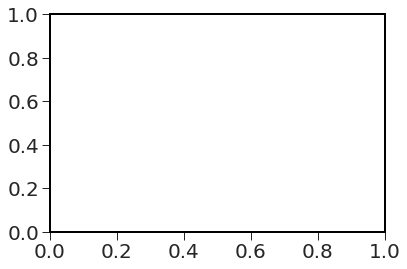

In [37]:
#sns.lmplot(x='date', y='value', data=df_cea)
sns.tsplot(data=df_cea, time='date', value='value')

In [ ]:
import matplotlib.pyplot as plt
sns.tsplot(data=df, time="date", unit="country",
           condition="Income Level", value="HIV Rate")


/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


ValueError: could not convert string to float: '01-Apr-2016'

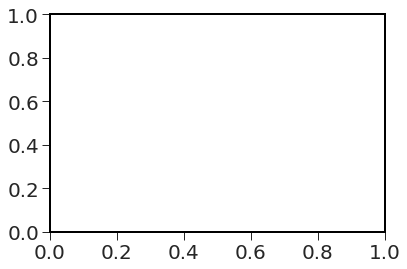

In [17]:
sns.tsplot(data=df, time='date',  unit="country",
           condition="Income Level", value="HIV Rate")